In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import requests
import json
from urllib.parse import urlencode

In [2]:
Zoopla_part1 = pd.read_csv("E:/文档/Urban Analytics/Dissertation/Data/Zoopla/UBDC File Transfer-nU2hfvxJPWj6sUwz/safeguarded-release-zoopla-glasgow_tongqing-zhu_12072022/Dataset/safeguarded-release-zoopla-historical-glasgow-city-2010-2021-080721/data1.csv")
Zoopla_part2 = pd.read_csv("E:/文档/Urban Analytics/Dissertation/Data/Zoopla/UBDC File Transfer-nU2hfvxJPWj6sUwz/safeguarded-release-zoopla-glasgow_tongqing-zhu_12072022/Dataset/safeguarded-release-zoopla-historical-glasgow-city-2010-2021-080721/data2.csv")
Zoopla_part3 = pd.read_csv("E:/文档/Urban Analytics/Dissertation/Data/Zoopla/UBDC File Transfer-nU2hfvxJPWj6sUwz/safeguarded-release-zoopla-glasgow_tongqing-zhu_12072022/Dataset/safeguarded-release-zoopla-historical-glasgow-city-2010-2021-080721/data3.csv")

Zoopla_0 = pd.concat([Zoopla_part1, Zoopla_part2, Zoopla_part3])
Zoopla_0.columns

Index(['listing_id', 'property_id', 'ttwa11nm', 'ttwa11cd', 'plan_no',
       'extract_date', 'result_count', 'details_url', 'description',
       'short_description', 'bullet_list', 'outcode', 'incode', 'price',
       'price_change', 'price_change_percent_list', 'price_change_date_list',
       'price_change_direction_list', 'price_change_summary.percent',
       'price_change_summary.direction',
       'price_change_summary.last_updated_date', 'first_marketed_date',
       'last_marketed_date', 'street_name', 'property_number', 'property_type',
       'category', 'num_bedrooms', 'num_floors', 'num_bathrooms',
       'num_recepts', 'county', 'country', 'post_town', 'displayable_address',
       'agent_address', 'agent_postcode', 'agent_name', 'agent_logo',
       'listing_status', 'status', 'branch_id', 'image_url', 'thumbnail_url',
       'image_caption', 'original_image_list', 'other_image_list',
       'other_image_desc_list', 'document_list', 'epc_list',
       'virtual_tour_list

In [3]:
len(Zoopla_0)

166079

In [4]:
# only select the data for sale
Zoopla_0['listing_status'].unique()

array(['rent', 'sale', nan], dtype=object)

In [5]:
Zoopla = Zoopla_0[Zoopla_0.listing_status == 'sale']
len(Zoopla)

126832

In [6]:
# drop na value
Zoopla = Zoopla.dropna(how = 'any', subset = ['property_type','last_marketed_date','displayable_address','num_bedrooms','price'])
Zoopla = Zoopla[Zoopla['last_marketed_date'] != 'None']
len(Zoopla)

84685

In [7]:
# Drop properties with bedrooms number > 6
Zoopla = Zoopla[(Zoopla['num_bedrooms'] <= 6) & (Zoopla['num_bedrooms'] >= 0)]
len(Zoopla)

84583

In [8]:
Zoopla['property_type'].unique()

array(['Flat', 'Studio', 'Semi-detached house', 'Detached house',
       'Terraced house', 'Mobile/park home', 'Parking/garage',
       'Maisonette', 'Town house', 'Barn conversion', 'End terrace house',
       'Houseboat', 'Mews house', 'Villa', 'Detached bungalow',
       'Link-detached house', 'Semi-detached bungalow', 'Bungalow',
       'Cottage', 'Terraced bungalow', 'Warehouse', 'Farmhouse', 'Chalet',
       'Equestrian property', 'Country house', 'Farm',
       'Leisure/hospitality', 'Lodge', 'Hotel/guest house',
       'Retail premises'], dtype=object)

In [9]:
# Drop specific property types
Zoopla = Zoopla.drop(Zoopla[(Zoopla['property_type']== 'Mobile/park home') |
                            (Zoopla['property_type']== 'Barn conversion') |
                            (Zoopla['property_type']== 'Country house') |
                            (Zoopla['property_type']== 'Chalet') |
                            (Zoopla['property_type']== 'Farmhouse')|
                            (Zoopla['property_type']== 'Houseboat')|
                            (Zoopla['property_type']== 'Hotel/guest house')|
                            (Zoopla['property_type']== 'Parking/garage')|
                            (Zoopla['property_type']== 'Warehouse')|
                            (Zoopla['property_type']== 'Retail premises')|
                            (Zoopla['property_type']== 'Lodge')].index)
len(Zoopla)

84414

In [10]:
# Drop price <= 50000
Zoopla = Zoopla[Zoopla['price'] > 50000]
len(Zoopla)

78953

In [11]:
Zoopla['date'] =  pd.to_datetime(Zoopla['last_marketed_date'], format = '%Y/%m/%d %H:%M')
Zoopla['date']

3       2015-07-14 11:22:45
7       2012-03-16 03:01:59
11      2014-07-07 13:06:17
12      2020-01-06 14:57:10
14      2015-12-26 01:45:14
                ...        
26071   2012-05-23 02:43:13
26072   2011-11-25 09:34:10
26073   2019-01-26 16:13:40
26075   2017-11-06 08:48:03
26077   2013-12-19 09:11:51
Name: date, Length: 78953, dtype: datetime64[ns]

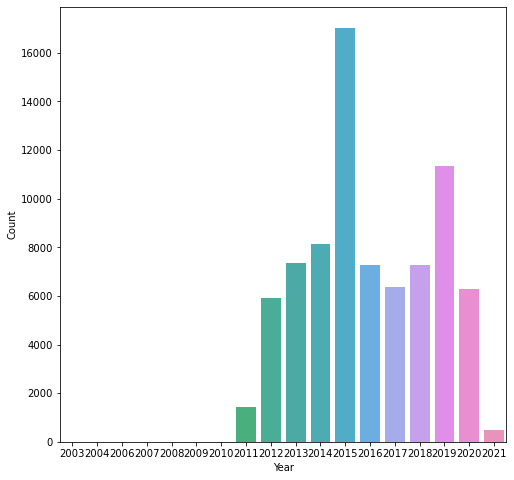

In [12]:
Zoopla['year'] = pd.DatetimeIndex(Zoopla['date']).year

fig, ax1 = plt.subplots(1,1, figsize=(8,8))
pt = sns.countplot(x = Zoopla['year'], ax=ax1)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [13]:
# use price/bedroom to replace house price by square meter
Zoopla['price/bedroom'] = Zoopla['price'] / Zoopla['num_bedrooms']
pd.DataFrame(Zoopla, columns = ['price','num_bedrooms','price/bedroom'])

,price,num_bedrooms,price/bedroom
3,59995,2,29997.500000
7,89995,2,44997.500000
11,99950,1,99950.000000
12,150000,3,50000.000000
14,125000,2,62500.000000
...,...,...,...
26071,210000,3,70000.000000
26072,175000,3,58333.333333
26073,225000,3,75000.000000
26075,230000,3,76666.666667


In [17]:
datazone = pd.read_csv('E:/文档/Urban Analytics/Dissertation/Data/postcode_link_datazone.txt')
datazone

,OBJECTID_1,Join_Count,TARGET_FID,OBJECTID,Postcode,District,Sector,DataZone,Name
0,1,1,1,63087,G1 1AB,G1,G1 1,S01010260,City Centre East - 02
1,2,1,2,63088,G1 1AD,G1,G1 1,S01010265,City Centre East - 07
2,3,1,3,63089,G1 1BL,G1,G1 1,S01010258,Gallowgate North and Bellgrove - 05
3,4,1,4,63090,G1 1BQ,G1,G1 1,S01010264,City Centre East - 06
4,5,1,5,63091,G1 1DA,G1,G1 1,S01010265,City Centre East - 07
...,...,...,...,...,...,...,...,...,...
14675,14676,1,14676,134263,PA1 3AN,PA1,PA1 3,S01009827,Penilee - 06
14676,14677,1,14677,134272,PA1 3AY,PA1,PA1 3,S01009828,Penilee - 07
14677,14678,1,14678,134292,PA1 3DE,PA1,PA1 3,S01009818,Cardonald West and Central - 04
14678,14679,1,14679,134293,PA1 3DF,PA1,PA1 3,S01009818,Cardonald West and Central - 04


In [20]:
Zoopla['postcode'] = Zoopla['outcode'] + ' ' + Zoopla['incode']
Zoopla['postcode']

3        G21 1NA
7        G42 9HT
11       G42 9HT
12       G20 6EA
14       G41 2DY
          ...   
26071    G84 9SF
26072    G84 9SF
26073    G84 9SF
26075    G84 9SF
26077    G84 9SF
Name: postcode, Length: 78953, dtype: object

In [21]:
Zoopla = pd.merge(Zoopla, datazone, how = "left", left_on = 'postcode',right_on = 'Postcode')
Zoopla

,listing_id,property_id,ttwa11nm,ttwa11cd,plan_no,extract_date,result_count,details_url,description,short_description,...,postcode,OBJECTID_1,Join_Count,TARGET_FID,OBJECTID,Postcode,District,Sector,DataZone,Name
0,11862842,27525336,Glasgow,S22000065,NS6067,2.017063e+13,1,http://www.zoopla.co.uk/property-history/12-ra...,Summaryoffered in good internal condition and ...,Offered in good internal condition and at comp...,...,G21 1NA,4126.0,1.0,4126.0,67224.0,G21 1NA,G21,G21 1,S01010218,Springburn East and Cowlairs - 05
1,16137543,27526686,Glasgow,S22000065,NS5861,2.017063e+13,5,http://www.zoopla.co.uk/property-history/5-bat...,"FlatEntrance HallRadiator, open plan to Kitche...",Oakleaf Homes are delighted to offer for sale ...,...,G42 9HT,10237.0,1.0,10237.0,73527.0,G42 9HT,G42,G42 9,S01010011,Mount Florida - 01
2,32557073,27526686,Glasgow,S22000065,NS5861,2.017063e+13,5,http://www.zoopla.co.uk/property-history/5-bat...,An attractive one bedroom traditional flat wit...,An attractive one bedroom traditional flat wit...,...,G42 9HT,10237.0,1.0,10237.0,73527.0,G42 9HT,G42,G42 9,S01010011,Mount Florida - 01
3,51879994,27526691,Glasgow,S22000065,NS5767,2.017022e+13,1,https://www.zoopla.co.uk/property-history/150-...,Smoothmove are delighted to bring to the marke...,Smoothmove are delighted to bring to the marke...,...,G20 6EA,3578.0,1.0,3578.0,66676.0,G20 6EA,G20,G20 6,S01010306,Firhill - 06
4,4232555,27526693,Glasgow,S22000065,NS5762,2.017070e+13,7,https://www.zoopla.co.uk/property-history/80-w...,****home report available****Countrywide Estat...,****home report available**** Countrywide Esta...,...,G41 2DY,9092.0,1.0,9092.0,72374.0,G41 2DY,G41,G41 2,S01009921,Shawlands West - 03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78948,1876111,9548164,Dumbarton and Helensburgh,S22000054,NS3082,2.017063e+13,4,http://www.zoopla.co.uk/property-history/1-dru...,SummarySpacious and bright three bedroom Detac...,Spacious and bright three bedroom Detached Vil...,...,G84 9SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78949,15502316,9548168,Dumbarton and Helensburgh,S22000054,NS3082,2.017063e+13,1,http://www.zoopla.co.uk/property-history/5-dru...,SummaryDetached bungalow with on the level acc...,Detached bungalow with on the level accommodat...,...,G84 9SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78950,48540406,9548169,NaN,NaN,NaN,NaN,1,https://www.zoopla.co.uk/property-history/6-dr...,Modern Detached Villa in a lovely position wit...,Modern Detached Villa in a lovely position wit...,...,G84 9SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78951,44216915,9548174,NaN,NaN,NaN,NaN,1,https://www.zoopla.co.uk/property-history/11-d...,SummaryThis modern detached family villa offer...,This modern detached family villa offers spaci...,...,G84 9SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Zoopla = Zoopla.dropna(how = 'any', subset = ['DataZone'])
len(Zoopla)

35579

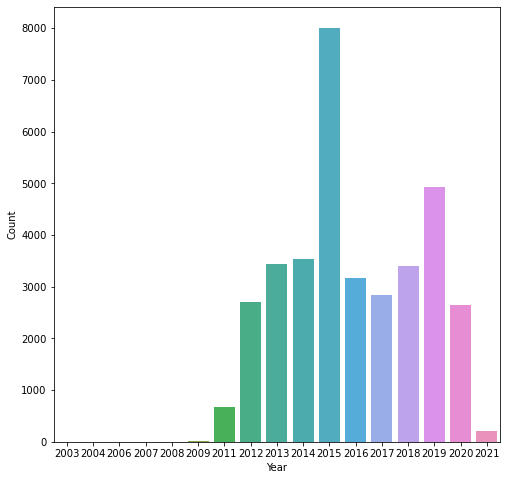

In [24]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
pt = sns.countplot(x = Zoopla['year'], ax=ax1)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [25]:
Zoopla_16 = Zoopla[(Zoopla['year'] == 2013)|(Zoopla['year'] == 2014)|(Zoopla['year'] == 2015)|(Zoopla['year'] == 2016)]
Zoopla_20 = Zoopla[(Zoopla['year'] == 2017)|(Zoopla['year'] == 2018)|(Zoopla['year'] == 2019)|(Zoopla['year'] == 2020)]

In [31]:
# use median vlaue of each data zone
Group_16 = Zoopla_16.groupby('DataZone')
Group_16_stat = Group_16.describe()['price/bedroom']
med_price_16 = pd.DataFrame(Group_16_stat, columns = ['50%'])
med_price_16

D:\Anaconda\Anaconda\lib\site-packages\numpy\lib\function_base.py:4011: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))
D:\Anaconda\Anaconda\lib\site-packages\numpy\lib\function_base.py:4012: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


,50%
DataZone,
S01009758,57916.666667
S01009759,47500.000000
S01009760,45416.666667
S01009761,62997.500000
S01009762,24749.375000
...,...
S01010499,21248.750000
S01010500,56250.000000
S01010501,42497.500000


In [32]:
# use median vlaue of each data zone
Group_20 = Zoopla_20.groupby('DataZone')
Group_20_stat = Group_20.describe()['price/bedroom']
med_price_20 = pd.DataFrame(Group_20_stat, columns = ['50%'])
med_price_20

,50%
DataZone,
S01009758,64000.000000
S01009760,54000.000000
S01009761,65000.000000
S01009762,26666.666667
S01009763,74750.000000
...,...
S01010499,21875.000000
S01010500,54250.000000
S01010501,54497.500000


In [34]:
med_price_16.to_csv('E:/文档/Urban Analytics/Dissertation/Data/houseprice_16.csv')
med_price_20.to_csv('E:/文档/Urban Analytics/Dissertation/Data/houseprice_20.csv')